# What can we learn from binary stars time-series data?

In [6]:
# ------- PACKAGES AND SOME GLOBAL CONFUGURATIONS ------- #

import numpy as np
import phoebe
from phoebe import u,c
logger = phoebe.logger(clevel='WARNING')

import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.weight': 'bold',  # Make all text bold
    'axes.labelweight': 'bold',  # Bold axis labels
    'axes.titleweight': 'bold',  # Bold title
    'axes.titlesize': 15,  # Title font size
    'axes.labelsize': 12,  # Axis label font size
    'xtick.labelsize': 10, # X tick label font size
    'ytick.labelsize': 10, # Y tick label font size
    'legend.fontsize': 8,  # Legend font size,
    'axes.edgecolor': "black", # Bold the edges of the axis
    'axes.linewidth': 2.50 # Line width of the axis borders
})

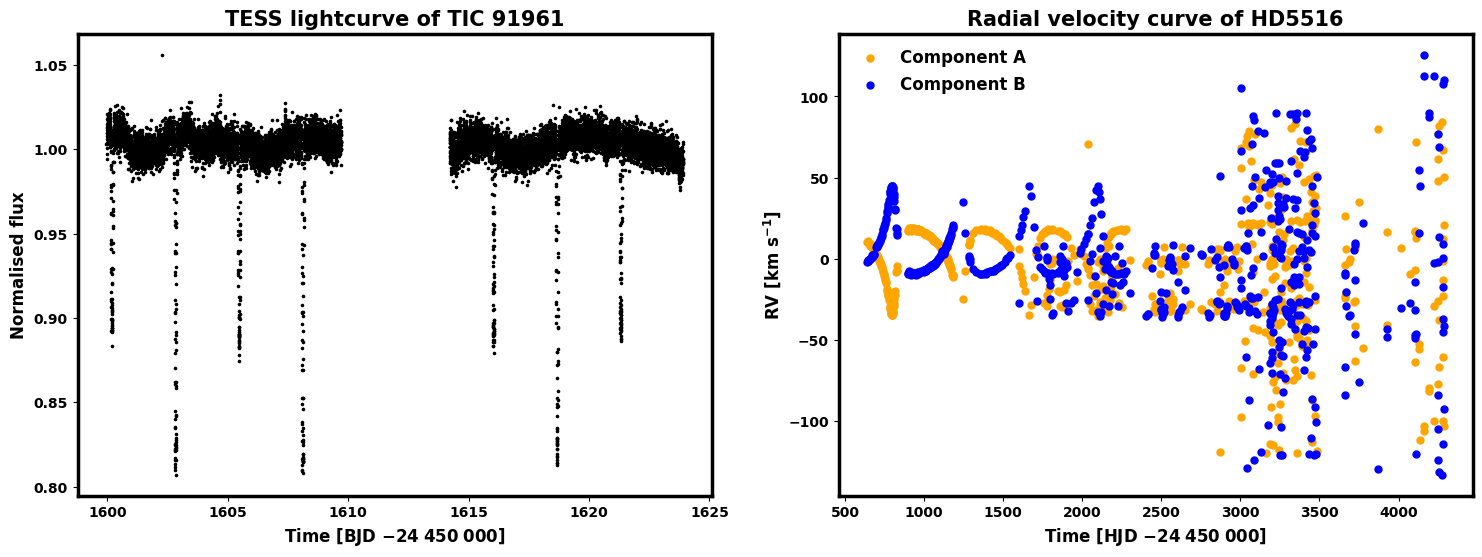

In [7]:
# ------ LOAD THE DATA ---------- #
lc_data = np.loadtxt("tic91961.lc")
t = lc_data[:, 0]
flx = lc_data[:, 1]

rv_data = np.loadtxt("HD5516.data")
t1 = rv_data[:, 0] - 24450000
rvA = rv_data[:, 1]
rvB = rv_data[:, 2]

# ------- MAKE THE PLOT ------------------ #

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
ax = axs[0]
ax1 = axs[1]
ax.set_xlabel(r"Time [BJD $- 24\;450\;000$]")
ax.set_ylabel("Normalised flux")
ax.set_title("TESS lightcurve of TIC 91961")
ax.scatter(t, flx, marker=".", s=10, c="k")


ax1.set_xlabel(r"Time [HJD $- 24\;450\;000$]")
ax1.set_ylabel(r"RV [km s$^{-1}$]")
ax1.set_title("Radial velocity curve of HD5516")
ax1.scatter(t1, rvA, marker=".", s=100, c="orange", label="Component A")
ax1.scatter(t1, rvB, marker=".", s=100, c="blue", label="Component B")
ax1.legend(fontsize=12, framealpha=0)

![alt text](parameters_from_data.png "A")

## The inverse problem

![alt text](inverse_problem.png "A")

# PHOEBE (PHysics Of Eclipsing Binaries)

In [8]:
import phoebe
from phoebe import u,c
logger = phoebe.logger(clevel='WARNING')

In [9]:
s = phoebe.default_star()

In [12]:
s["ntriangles"] = 1500
s.add_dataset('mesh', compute_times=[0], dataset="mesh01", overwrite=True)

<ParameterSet: 10 parameters | contexts: constraint, compute, dataset>

In [13]:
s.set_value('columns', value=['teffs', 'loggs'])
s.run_compute()

100%|██████████| 1/1 [00:00<00:00, 104.43it/s]


<ParameterSet: 8 parameters | qualifiers: times, uvw_elements, xyz_elements, uvw_normals, loggs, teffs, xyz_normals, comments>

Mon, 24 Nov 2025 12:49 matplotlib.axes._base WARNING Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


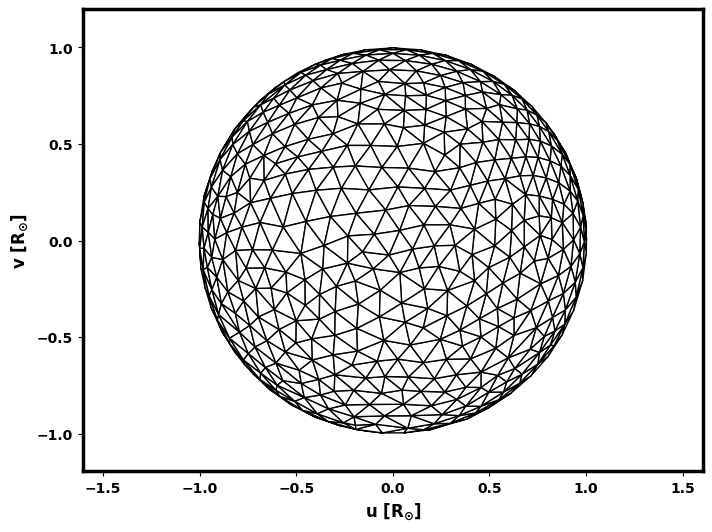

In [14]:
afig, mplfig = s.filter(dataset='mesh01').plot(time=0, show=True)

mplfig.savefig("./Figures/triangular_mesh.png")

In [26]:
b = phoebe.default_binary()
b.add_dataset('lc', compute_times=phoebe.linspace(0,1,101), dataset='lc01')
b.add_dataset('mesh', compute_times=[0, 0.25, 0.4, 0.5, 0.6, 0.75, 1.0], dataset='mesh01')
b.set_value('columns', value=['teffs', 'loggs', '*intensities*'])
b.run_compute()

100%|██████████| 101/101 [00:01<00:00, 59.86it/s]


<ParameterSet: 145 parameters | kinds: lc, mesh>

Mon, 24 Nov 2025 13:00 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.400000, assuming named color
Mon, 24 Nov 2025 13:00 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.400000, assuming named color
Mon, 24 Nov 2025 13:00 matplotlib.axes._base WARNING Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


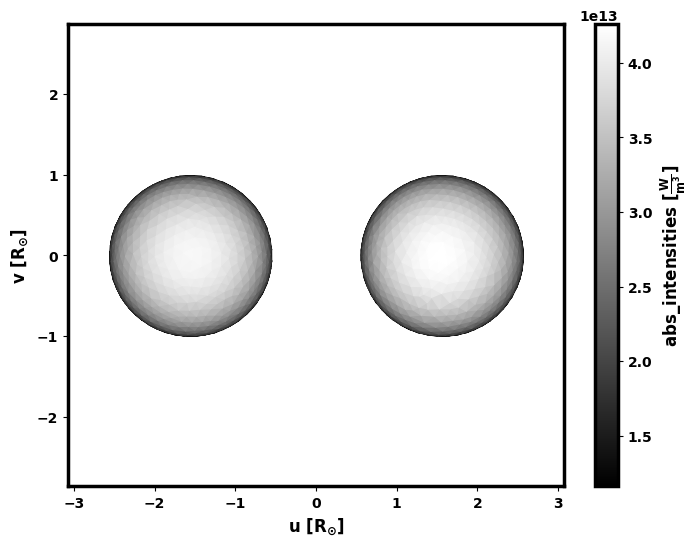

In [27]:
afig, mplfig = b.filter(dataset='mesh01').plot(time=0.4, show=True, fc='abs_intensities', ec="face", fcmap="gray", draw_sidebars=True)
#afig, mplfig = b.filter(dataset='lc01').plot(time=0.4, show=True)#, fc='abs_intensities', ec="face", fcmap="gray", draw_sidebars=True)

In [28]:
b = phoebe.default_binary()
b.add_constraint('semidetached', 'primary')
b['q'] = 1.3
b['sma@binary'] = 6.

In [29]:
b.add_dataset('mesh', compute_times=phoebe.linspace(0, 3, 30), dataset='mesh01', columns=['teffs'], overwrite=True)
b.add_dataset("lc", compute_times=phoebe.linspace(0, 3, 101), dataset="lc01", overwrite=True)

<ParameterSet: 80 parameters | contexts: constraint, figure, compute, dataset>

In [30]:
b.run_compute()

100%|██████████| 129/129 [00:02<00:00, 43.90it/s]


<ParameterSet: 305 parameters | kinds: mesh, lc>

Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring fc=teffs
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING fc and ec are not allowable for dataset=lc01 with kind=lc, ignoring ec=face
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.000000, assuming named color
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.000000, assuming named color
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.103448, assuming named color
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.103448, assuming named color
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.206897, assuming named color
Mon, 24 Nov 2025 13:01 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.206897, assuming named col

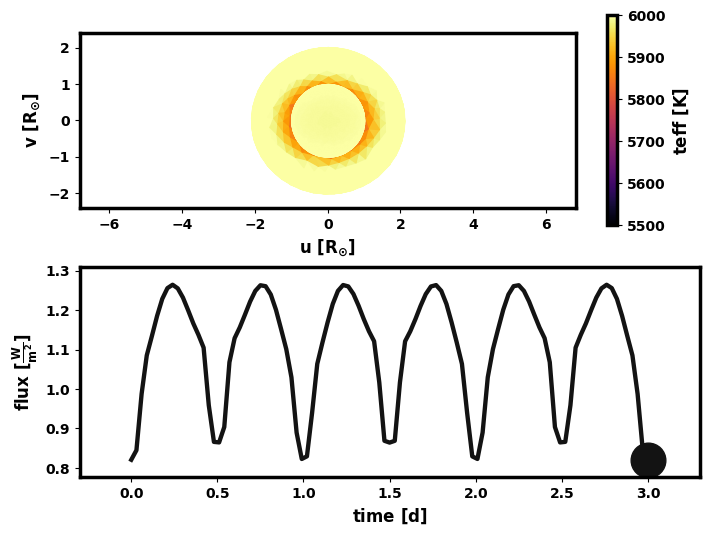

In [ ]:
afig, mplfig = b.plot(animate=True, 
                       show=True,
                       fc='teffs', ec="face",
                       fcmap='inferno',
                       fclim=(5500, 6000),
                       draw_sidebars=True,
                       save="./Figures/animated.gif")


# The inverse problem in PHOEBE

![alt text](inverse_problem_workflow.png "A")

In [32]:
# ------ MOCK DATA ------ #

b = phoebe.default_binary()
b.set_value('ecc', 0.2)
b.set_value('per0', 25)
b.set_value('teff@primary', 7000)
b.set_value('teff@secondary', 6000)
b.set_value('sma@binary', 7)
b.set_value('incl@binary', 80)
b.set_value('q', 0.3)
b.set_value('t0_supconj', 0.1)
b.set_value('requiv@primary', 2.0)
b.set_value('vgamma', 80)


lctimes = phoebe.linspace(0, 10, 1005)
rvtimes = phoebe.linspace(0, 10, 105)
b.add_dataset('lc', compute_times=lctimes)
b.add_dataset('rv', compute_times=rvtimes)


#b.add_compute('ellc', compute='fastcompute')
b.set_value_all('ld_mode', 'lookup')
b.run_compute()

100%|██████████| 1105/1105 [01:33<00:00, 11.79it/s]


<ParameterSet: 7 parameters | kinds: lc, rv>

In [33]:
fluxes = b.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.01
fsigmas = np.ones_like(lctimes) * 0.02

rvsA = b.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsB = b.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsigmas = np.ones_like(rvtimes) * 20

In [34]:
lc_data = np.column_stack((lctimes, fluxes, fsigmas))
rvA_data = np.column_stack((rvtimes, rvsA, rvsigmas))
rvB_data = np.column_stack((rvtimes, rvsB, rvsigmas))
np.savetxt("lc.data", lc_data)
np.savetxt("rvA.data", rvA_data)
np.savetxt("rvB.data", rvB_data)

In [35]:
## new system

b = phoebe.default_binary()

b.set_value('latex_repr', component='binary', value='orb')
b.set_value('latex_repr', component='primary', value='1')
b.set_value('latex_repr', component='secondary', value='2')

b.add_dataset('lc', 
              compute_phases=phoebe.linspace(0,1,201),
              times=lctimes, 
              fluxes=fluxes, 
              sigmas=fsigmas, 
              dataset='lc01')

b.add_dataset('rv', 
              compute_phases=phoebe.linspace(0,1,201),
              times=rvtimes, 
              rvs={'primary': rvsA, 'secondary': rvsB}, 
              sigmas=rvsigmas, 
              dataset='rv01')

b.set_value_all('ld_mode', 'lookup')

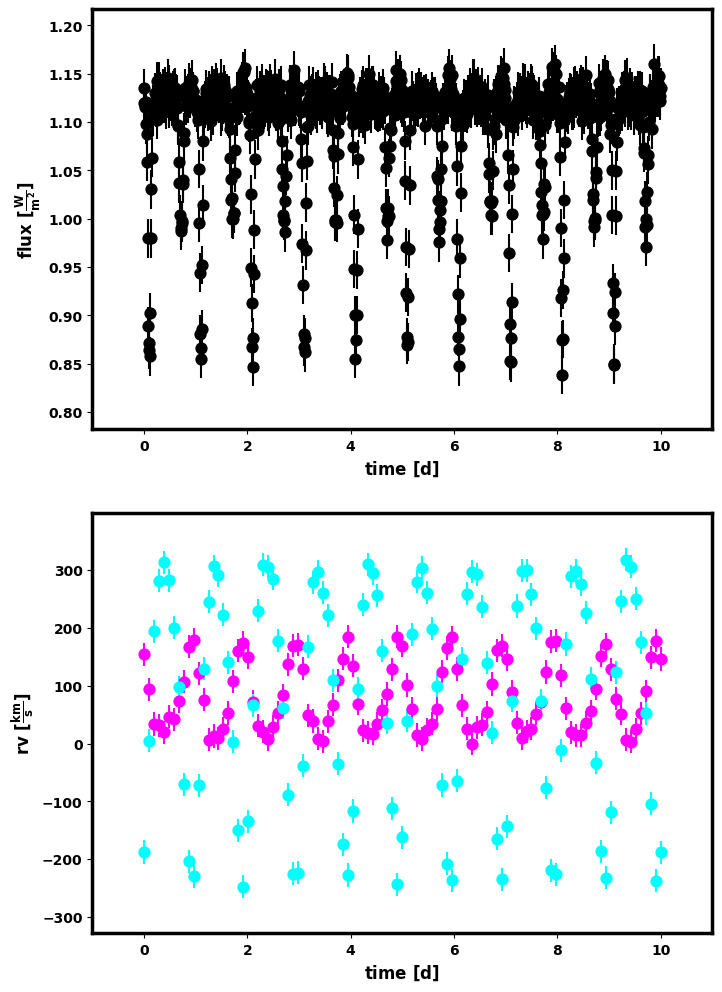

In [36]:
afig, mplfig = b.plot(x='times',
                      color={'lc01@dataset': 'k', 'rv01@primary@dataset': 'm', 'rv01@secondary@dataset':'c'},
                      marker={'lc01@dataset': 'o', 'rv01@primary@dataset': 'o', 'rv01@secondary@dataset': 'o'},
                      ls = {'lc01@model': '-', 'rv01@primary@model': '-', 'rv01@secondary@model': '--'},
                      size={'lc01@dataset': .01, 'rv01@primary@dataset': .01, 'rv01@secondary@dataset': .01,
                            'lcV@model': .01},
                      label={'lc01@dataset': 'data@B-band',
                        'lc01@model': 'model@pB-band',
                        'rv01@primary@dataset': 'data@primary', 'rv01@secondary@dataset':'data@secondary',
                        'rv01@primary@model': 'model@primary', 'rv01@secondary@model': 'model@secondary'},
                      show=True, save="./Figures/mock_data.png")

In [37]:
# ensures the model light curve is scaled to the data
b.set_value('pblum_mode', 'dataset-scaled')
# speeds up run_compute
b.set_value_all('distortion_method', 'sphere')
# avoids errors from atmospheres
b.set_value_all('atm', 'blackbody')
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_mode_bol', 'manual')

In [38]:
phoebe.list_available_solvers()

['estimator.ebai',
 'estimator.lc_geometry',
 'estimator.lc_periodogram',
 'estimator.rv_geometry',
 'estimator.rv_periodogram',
 'optimizer.cg',
 'optimizer.differential_corrections',
 'optimizer.differential_evolution',
 'optimizer.nelder_mead',
 'optimizer.powell',
 'sampler.dynesty',
 'sampler.emcee']

In [39]:
b.add_solver('estimator.rv_geometry',
             solver='rvgeom_solver', overwrite=True)
b.run_solver(kind='rv_geometry', solution='rv_geom_sol', overwrite=True)
print(b.adopt_solution('rv_geom_sol', trial_run=True, overwrite=True))

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.12771831198136657 d
         q@binary@orbit@component: 0.3142734238313842
     asini@binary@orbit@component: 7.353044809141248 solRad
       ecc@binary@orbit@component: 0.1335166494750419
      per0@binary@orbit@component: 39.04591055805064 deg
                    vgamma@system: 79.8536006236259 km / s


In [42]:
b["asini@binary@constraint"]
b.flip_constraint('asini@orbit', solve_for='sma@binary')

<ConstraintParameter: {sma@binary@component} = {asini@binary@component} / (sin({incl@binary@component})) (solar units) => 5.3 solRad>

In [43]:
b.adopt_solution('rv_geom_sol', overwrite=True)
b.run_compute(model='rvgeom_model')

100%|██████████| 201/201 [00:07<00:00, 26.40it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

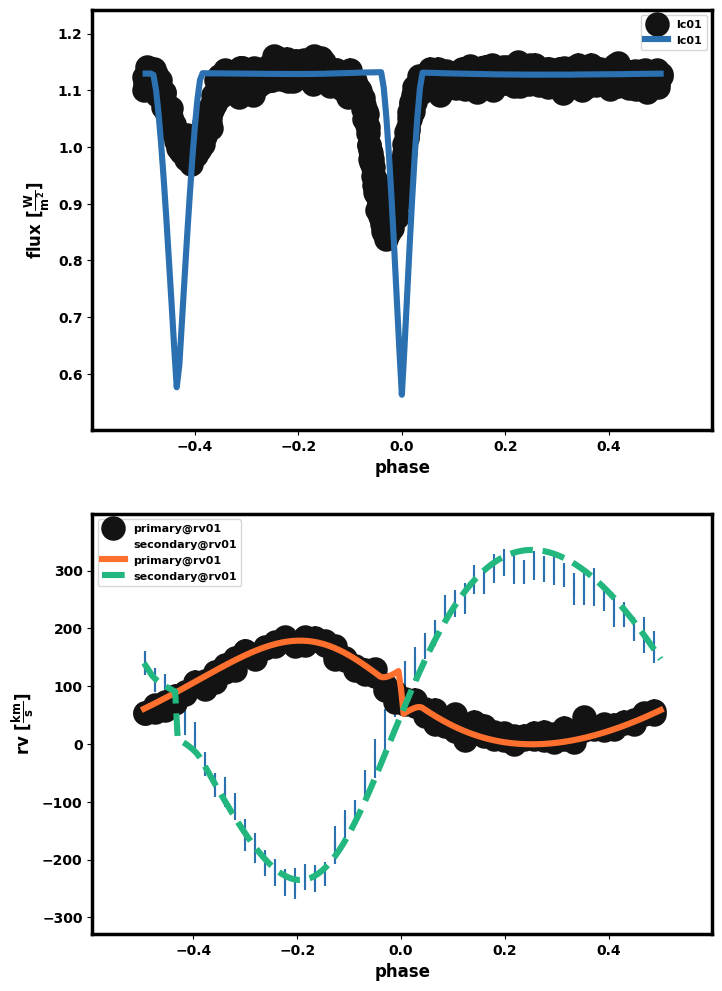

In [46]:
afig, mplfig = b.plot(x='phase', legend=True,
                      show=True)#, save='./Figures/figure_rv_geometry.png')

In [61]:
b.add_solver('estimator.lc_geometry',
             solver='lcgeom_solver', overwrite=True)
b.run_solver(solver='lcgeom_solver', solution='lc_geom_sol', overwrite=True)
print(b.adopt_solution('lc_geom_sol', trial_run=True, overwrite=True))

Mon, 24 Nov 2025 13:29 SOLVER       WARNING binning input observations (len: 1005) with 500 bins (ignores sigmas)


ParameterSet: 5 parameters
   t0_supconj@binary@orbit@com...: 0.10164565252643235 d
       ecc@binary@orbit@component: 0.1918403800187974
      per0@binary@orbit@component: 14.655072111279237 deg
   requivsumfrac@binary@orbit@...: 0.5566190252944085
   teffratio@binary@orbit@comp...: 0.8460809218630816


In [69]:
b.adopt_solution('lc_geom_sol')
b['requivsumfrac@binary'] = 0.5
b.run_compute(model='lc_geom_model')

100%|██████████| 201/201 [00:07<00:00, 25.76it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

/home/dbenitez/miniconda3/envs/phoebe/lib/python3.10/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


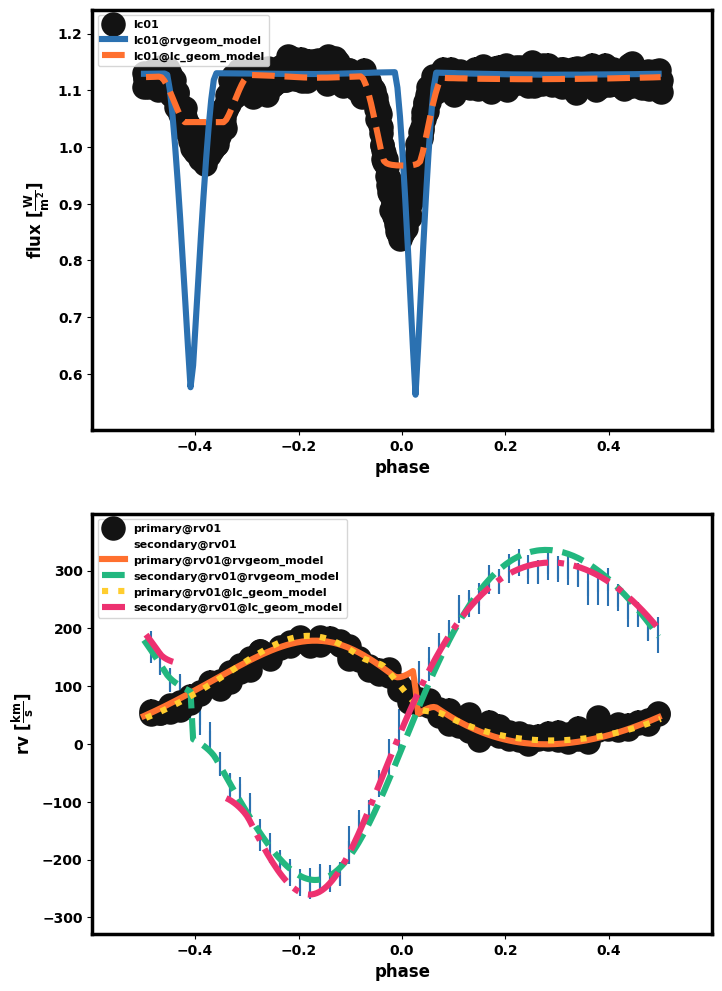

In [70]:
afig, mplfig = b.plot(x='phase', legend=True,
                      show=True)#, save='./Figures/figure_lc_geometry.png')

In [71]:
b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')

<ConstraintParameter: {per0@binary@component} = arctan2({esinw@binary@component}, {ecosw@binary@component}) (solar units) => 14.655072111279237 deg>

In [72]:
b.add_solver('estimator.ebai', ebai_method='mlp', solver='ebai_mlp_est', overwrite=True)
b.run_solver('ebai_mlp_est', solution='ebai_mlp_solution', overwrite=True)
print(b.adopt_solution('ebai_mlp_solution', trial_run=True))
b.adopt_solution('ebai_mlp_solution')
b.run_compute(model='ebai_mlp_model')

Mon, 24 Nov 2025 13:32 SOLVER       WARNING binning input observations (len: 1005) with 500 bins (ignores sigmas)


ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.1015916334661355 d
   teffratio@binary@orbit@comp...: 0.6335067887121459
   requivsumfrac@binary@orbit@...: 0.41582160061874485
     esinw@binary@orbit@component: -0.010343673568262157
     ecosw@binary@orbit@component: 0.09762764819530134
      incl@binary@orbit@component: 74.82861199447622 deg


Mon, 24 Nov 2025 13:32 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=9471K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Mon, 24 Nov 2025 13:32 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=9471K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
100%|██████████| 201/201 [00:07<00:00, 27.03it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

In [73]:
b.add_solver('estimator.ebai', ebai_method='knn', solver='ebai_knn_est', overwrite=True)
b.run_solver('ebai_knn_est', solution='ebai_knn_solution', overwrite=True)
print(b.adopt_solution('ebai_knn_solution', trial_run=True))
b.adopt_solution('ebai_knn_solution')
b.run_compute(model='ebai_knn_model')

Mon, 24 Nov 2025 13:33 SOLVER       WARNING binning input observations (len: 1005) with 500 bins (ignores sigmas)
Mon, 24 Nov 2025 13:33 PHOEBE       WARNING checks will not be run until 'run_checks' or 'run_compute' is called.
Mon, 24 Nov 2025 13:33 PHOEBE       WARNING constraints will not be run until 'run_delayed_constraints' or 'run_compute' is called.  This may result in inconsistent parameters if printing values before calling either of these methods.
/home/dbenitez/miniconda3/envs/phoebe/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.0.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/dbenitez/miniconda3/envs/phoebe/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarni

ParameterSet: 6 parameters
   t0_supconj@binary@orbit@com...: 0.10159561752988058 d
   teffratio@binary@orbit@comp...: 0.7821623478643517
   requivsumfrac@binary@orbit@...: 0.42975190000485064
     esinw@binary@orbit@component: 0.03714920249835905
     ecosw@binary@orbit@component: 0.15613049779083107
      incl@binary@orbit@component: 75.82759808916137 deg


100%|██████████| 201/201 [00:07<00:00, 25.23it/s]


<ParameterSet: 8 parameters | kinds: lc, rv>

/home/dbenitez/miniconda3/envs/phoebe/lib/python3.10/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


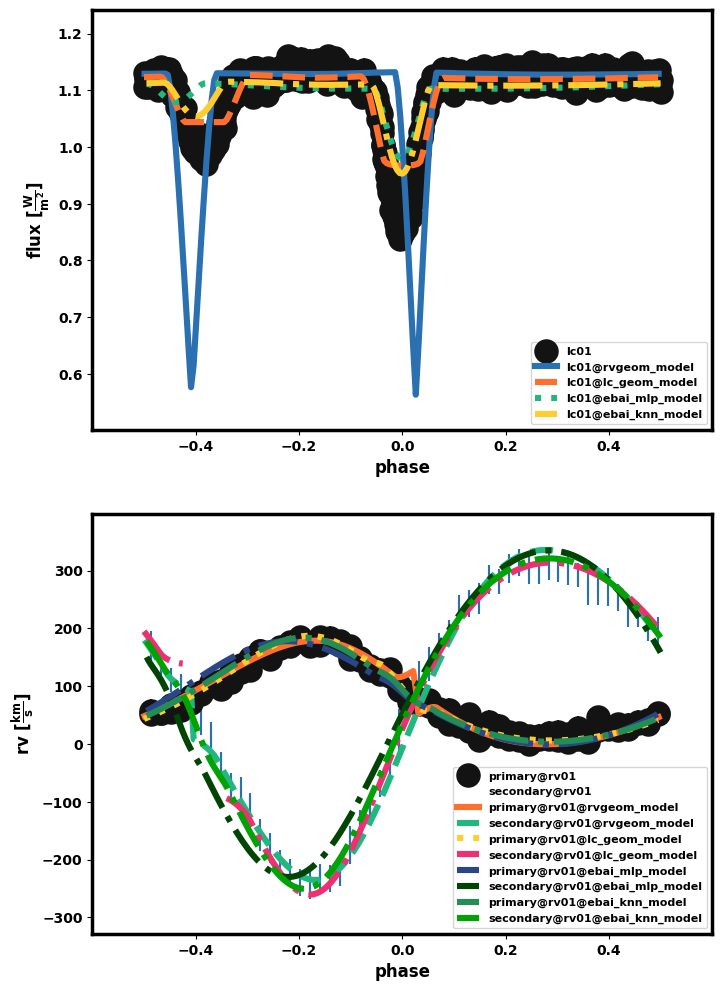

In [74]:
afig, mplfig = b.plot(x='phase', legend=True,
                      show=True)#, save='./Figures/figure_ebai.png')

In [75]:
b.save('./after_estimators.bundle')

'./after_estimators.bundle'

## Optimizers

In [81]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt
#Load Previous Bundle
b = phoebe.open('./after_estimators.bundle')

In [77]:
print(b.models, b.computes)

['rvgeom_model', 'lc_geom_model', 'ebai_mlp_model', 'ebai_knn_model'] ['phoebe01']


100%|██████████| 201/201 [00:07<00:00, 26.77it/s]


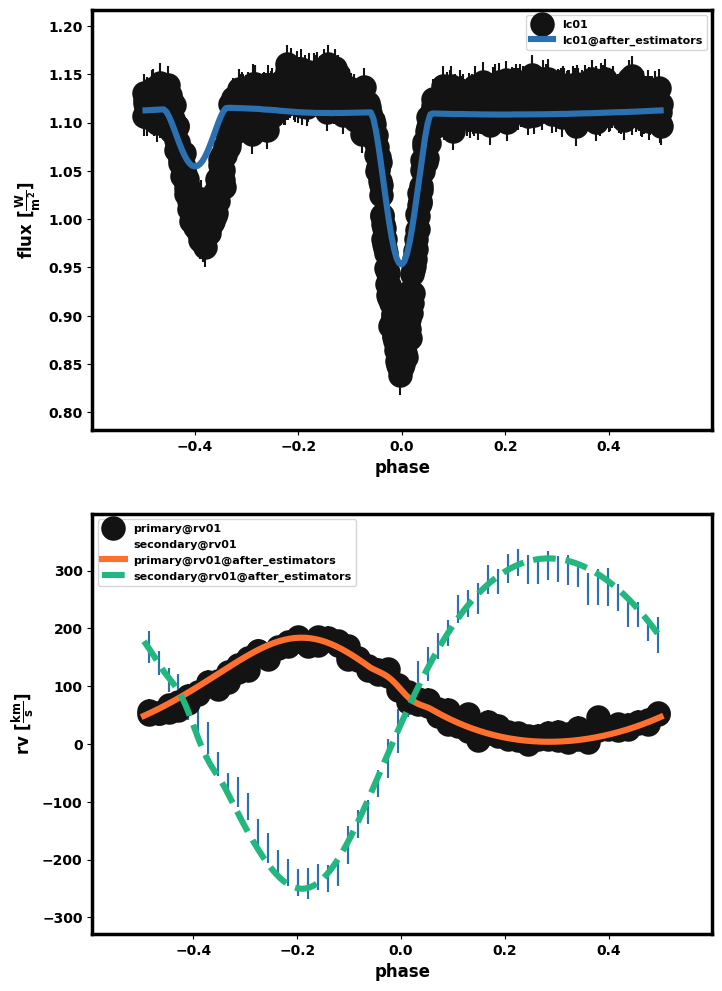

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [82]:
b.run_compute('phoebe01', model='after_estimators', overwrite=True)
b.plot(model='after_estimators', x='phases', show=True, legend=True)

In [83]:
b.add_compute(compute='nm_fit',
              irrad_method='none',
              rv_method='dynamical',
              distortion_method='sphere',
              overwrite=True)

b.flip_constraint('compute_phases@rv01', solve_for='compute_times')
b.set_value_all('compute_phases', dataset='rv01', value=phoebe.linspace(0, 1, 26))
b.flip_constraint('compute_phases@lc01', solve_for='compute_times')
b.set_value_all('compute_phases', dataset='lc01', value=phoebe.linspace(0, 1, 101))

ValueError: 0 results found for twig: 'compute_phases@rv01', {'context': 'constraint', 'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [79]:
phoebe.list_available_solvers()

['estimator.ebai',
 'estimator.lc_geometry',
 'estimator.lc_periodogram',
 'estimator.rv_geometry',
 'estimator.rv_periodogram',
 'optimizer.cg',
 'optimizer.differential_corrections',
 'optimizer.differential_evolution',
 'optimizer.nelder_mead',
 'optimizer.powell',
 'sampler.dynesty',
 'sampler.emcee']

In [85]:
b.add_solver('optimizer.nelder_mead',  solver='nm_solver', compute='nm_fit')
b.set_value('maxiter', solver='nm_solver', value=20)
b.disable_dataset('lc01')

<ParameterSet: 22 parameters | components: binary, primary, secondary>

In [86]:
b['fit_parameters@nm_solver'] = ['vgamma@system', 't0_supconj@binary', 'q@binary', 'asini@binary']
b.run_solver('nm_solver', solution='nm_solution', overwrite=True)

100%|██████████| 20/20 [00:41<00:00,  2.07s/it]


<ParameterSet: 11 parameters | qualifiers: fitted_units, adopt_parameters, success, niter, adopt_distributions, fitted_twigs, adopt_values, message, initial_values, fitted_values, comments>

In [87]:
print(b.adopt_solution('nm_solution'))#, trial_run=True))
b.run_compute('nm_fit', solution='nm_solution', model='after_nm', overwrite=True)

Mon, 24 Nov 2025 13:37 BUNDLE       WARNING applying passed solution (nm_solution) to sample_from
Mon, 24 Nov 2025 13:37 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@nm_solution=False


ParameterSet: 22 parameters
                    vgamma@system: 79.78585497913683 km / s
      t0_supconj@binary@component: 0.10823697374572036 d
               q@binary@component: 0.3046756060029479
           asini@binary@component: 6.978717968541894 solRad
C     t0_perpass@binary@component: -0.0564336686070632 d
C         t0_ref@binary@component: 0.15638880193341168 d
C      compute_times@lc01@dataset: [0.10823697 0.11323697 0.11823697 ...
 1.09823697 1.10323697 1.10823697] d
C      compute_times@rv01@dataset: [0.10823697 0.11323697 0.11823697 ...
 1.09823697 1.10323697 1.10823697] d
C          mass@primary@component: 3.8351503456656015 solMass
C           sma@primary@component: 1.680871747152589 solRad
C         asini@primary@component: 1.6297117202207883 solRad
C    requiv_max@primary@component: 3.0327843273786903 solRad
C        mass@secondary@component: 1.1684767556780824 solMass
C         sma@secondary@component: 5.51692263520541 solRad
C       asini@secondary@component: 5.34900

Mon, 24 Nov 2025 13:37 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


<ParameterSet: 10 parameters | components: primary, secondary>

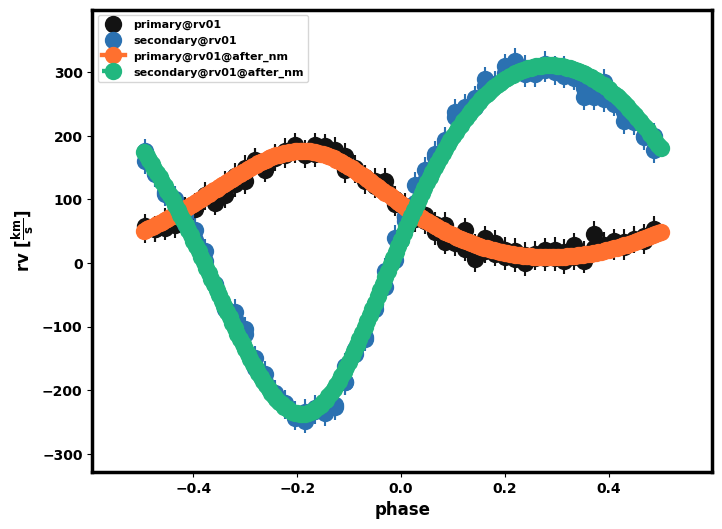

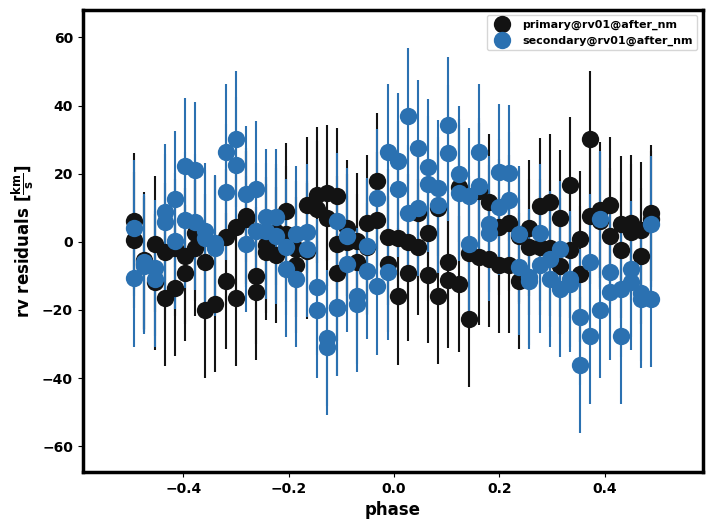

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [88]:
b.plot(kind='rv', model='after_nm', x='phases', show=True, legend=True, marker = 'o')
b.plot( kind='rv', model='after_nm', x='phases', y='residuals', show=True, legend=True, marker = 'o')

In [89]:
b.disable_dataset('rv01')
b.enable_dataset('lc01')

<ParameterSet: 22 parameters | components: binary, primary, secondary>

In [90]:
b.set_value(solution = 'lc_geom_sol', qualifier='adopt_parameters', value=['mask_phases'])
b.adopt_solution('lc_geom_sol')

<ParameterSet: 1 parameters>

In [91]:
print(b['mask_phases'])

ParameterSet: 2 parameters
         mask_phases@lc01@dataset: [[-0.13928225  0.13943212]
 [-0.53588869 -0.22873911]]
         mask_phases@rv01@dataset: []


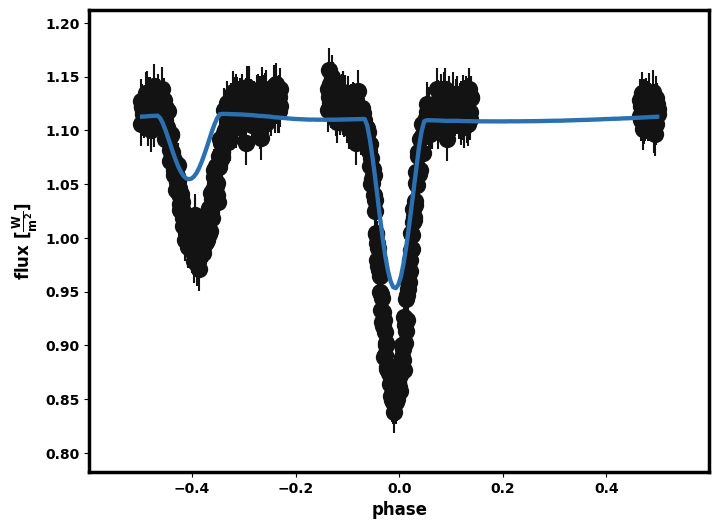

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [92]:
b.plot(kind='lc', model='after_estimators', x='phases', show='True')

In [93]:
b.flip_constraint('requiv@primary', solve_for='requivsumfrac@binary')

b['fit_parameters'] = ['teffratio@binary',
                       't0_supconj@binary',
                       'incl@binary']

In [94]:
b.run_solver('nm_solver', solution='nm_solution', overwrite=True)

Mon, 24 Nov 2025 13:38 BUNDLE       WARNING fit_parameters contains a parameter (['t0_supconj']) that affects phasing which could cause issues with mask_phases
100%|██████████| 20/20 [02:25<00:00,  7.26s/it]


<ParameterSet: 11 parameters | qualifiers: fitted_units, adopt_parameters, success, niter, adopt_distributions, fitted_twigs, adopt_values, message, initial_values, fitted_values, comments>

In [95]:
print(b.adopt_solution('nm_solution', trial_run=True))
b.run_compute('nm_fit', solution='nm_solution', model='after_nmlc')

Mon, 24 Nov 2025 13:41 BUNDLE       WARNING applying passed solution (nm_solution) to sample_from
Mon, 24 Nov 2025 13:41 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@nm_solution=False


ParameterSet: 3 parameters
   teffratio@binary@orbit@comp...: 0.8497077362785617
   t0_supconj@binary@orbit@com...: 0.10335321085581041 d
      incl@binary@orbit@component: 80.74993021400724 deg


Mon, 24 Nov 2025 13:41 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:04<00:00,  4.68s/it]


<ParameterSet: 9 parameters | qualifiers: times, samples, failed_samples, sampled_uniqueids, fluxes, sample_mode, comments, sampled_twigs, flux_scale>

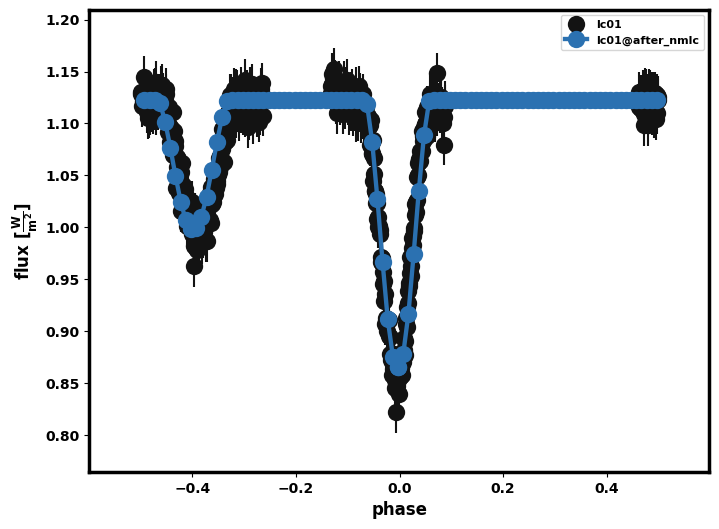

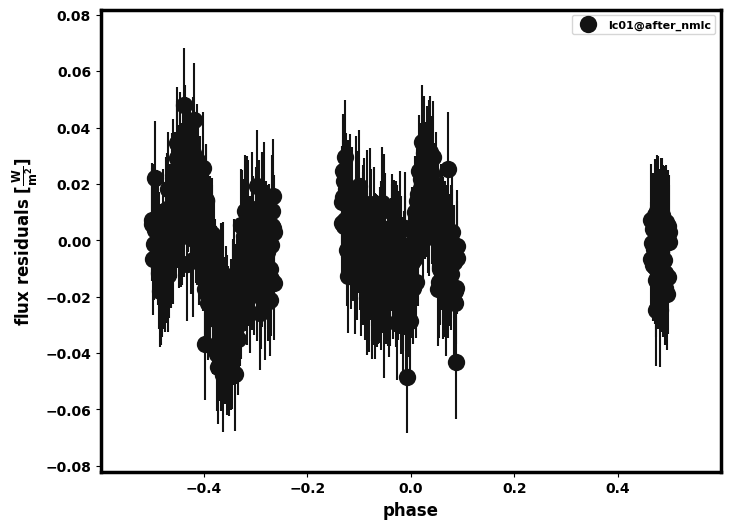

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [223]:
b.plot(kind='lc', model='after_nmlc', x='phases', show=True, legend=True, marker = 'o')
b.plot(kind='lc', model='after_nmlc', x='phases', y='residuals', show=True, legend=True, marker = 'o')

In [224]:
b.adopt_solution('nm_solution')

<ParameterSet: 24 parameters | contexts: component, dataset>

In [225]:
b.save('./after_optimizers.bundle')

'./after_optimizers.bundle'

## Samplers

In [226]:
import phoebe
logger = phoebe.logger()
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [227]:
b = phoebe.load('./after_optimizers.bundle')

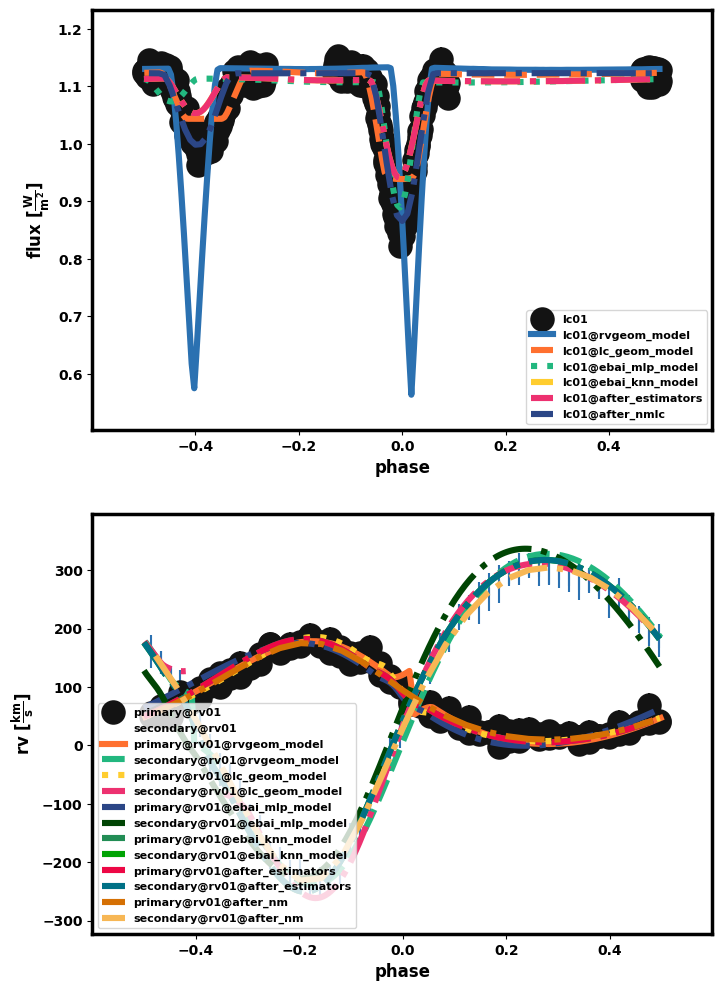

(<autofig.figure.Figure | 2 axes | 21 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [228]:
b.plot(x='phase', show=True, legend=True)

In [229]:
b.add_compute(compute='dyn_rv')
b['enabled@lc01@dyn_rv'] = False
b['rv_method@primary@dyn_rv'] = 'dynamical'
b['rv_method@secondary@dyn_rv'] = 'dynamical'
b['irrad_method@dyn_rv'] = 'none'

In [232]:
b.add_distribution({
    'asini@orbit': phoebe.gaussian_around(0.5),
    'q@binary': phoebe.gaussian_around(0.1),
    'vgamma@system': phoebe.gaussian_around(5.0),
    'ecc@orbit': phoebe.gaussian_around(0.05),
    'per0@orbit': phoebe.gaussian_around(10.0)
}, distribution='ndg', overwrite_all=True)

<ParameterSet: 5 parameters | qualifiers: vgamma, q, per0, ecc, asini>

In [ ]:
b.run_compute(compute='dyn_rv', sample_from='ndg', sample_num=50, model='from_ndg', overwrite=True)

In [ ]:
b.plot(model='from_ndg', x='phase', show=True)
b.plot(model='from_ndg', x='phase', y='residuals', show=True)

In [ ]:
b.add_solver('sampler.emcee', solver='mcmc', compute='dyn_rv', init_from='ndg', overwrite=True)

In [ ]:
b.run_solver('mcmc', solution='round_1')

In [ ]:
b.plot(solution='round_1', style='lnprobability', burnin=0, thin=1, show=True)

In [ ]:
b.plot(solution='round_1', style='lnprobability', burnin=50, thin=1, show=True)

In [ ]:
b.plot(solution='round_1', style='corner', burnin=50, thin=1, show=True)

In [ ]:
b.save('./after_initial_sampling.bundle')